# 회귀 (Regression)

1. 목적: 연속적인 값(예: 가격, 온도, 시간 등)을 예측하는 것이 목적입니다.

2. 출력 유형: 실수 값(연속 값)을 출력합니다. 예를 들어, 집의 가격이나 자동차의 연비 등이 회귀 문제의 예시입니다.

3. 모델 예시: 선형 회귀, 다중 회귀, 릿지(Ridge) 및 라쏘(Lasso) 회귀, 다항 회귀, 서포트 벡터 머신 등.

4. 평가 방법: 평균 제곱 오차(Mean Squared Error, MSE), 평균 절대 오차(Mean Absolute Error, MAE), 결정 계수(R²) 등으로 평가합니다

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('./open/train.csv')

In [69]:
df

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,NaN,69.8,1.8,8.8,10.25,91.7,-2.6
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


In [71]:
df.isnull().sum()

일시          0
최고기온        3
최저기온        3
일교차         4
강수량     13861
평균습도        0
평균풍속        4
일조합       118
일사합      4862
일조율       366
평균기온        0
dtype: int64

In [72]:
df.describe()

,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
count,23008.000000,23008.000000,23007.000000,9150.000000,23011.000000,23007.000000,22893.000000,18149.000000,22645.000000,23011.000000
mean,17.071714,8.451960,8.619277,9.593683,65.202851,2.380993,5.858826,11.933170,48.653526,12.415419
std,10.714471,10.578285,2.907096,21.966135,14.549077,0.947595,3.816941,6.419122,31.662321,10.489515
min,-13.600000,-20.200000,1.000000,0.000000,17.900000,0.100000,0.000000,0.000000,0.000000,-16.400000
25%,7.800000,-0.300000,6.600000,0.100000,54.900000,1.700000,2.200000,7.000000,17.800000,3.400000
50%,18.900000,9.200000,8.600000,1.400000,65.500000,2.200000,6.600000,11.220000,55.700000,13.800000
75%,26.400000,17.900000,10.600000,8.500000,75.800000,2.900000,9.000000,16.620000,78.000000,21.800000
max,39.600000,30.300000,19.600000,332.800000,99.800000,7.800000,13.700000,33.480000,96.900000,33.700000


# 강수량 60%, 일사합 21% 결측치 존재

1. 결측치가 포함된 행을 제거할 것인가?

2. 결측치를 대체할 것 인가?

In [73]:
df_clean = df.dropna()

In [74]:
df_clean

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
4749,1973-01-01,7.0,-1.2,8.2,2.9,75.0,3.0,2.4,4.81,25.0,3.2
4751,1973-01-03,-2.8,-11.3,8.5,0.0,66.3,1.4,2.8,6.16,28.9,-7.5
4754,1973-01-06,4.5,-2.8,7.3,1.2,75.5,2.0,1.9,5.23,19.6,0.6
4755,1973-01-07,2.0,0.4,1.6,11.2,96.3,2.6,0.0,1.92,0.0,0.8
4756,1973-01-08,4.4,0.0,4.4,0.0,83.8,2.4,6.4,8.74,66.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...
23000,2022-12-21,2.6,-2.6,5.2,3.6,82.4,2.7,0.0,2.48,0.0,-0.1
23007,2022-12-28,0.1,-6.0,6.1,0.1,58.1,2.5,8.7,10.86,90.6,-3.3
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8


### 데이터의 손실이 너무 큼
23011 -> 7089

2. 결측치를 채우는 방향

1) 최고기온 3 : 전날과 비슷할 가능성이 높음 bfill

2) 최저기온 3 : 전날과 비슷할 가능성이 높음 bfill

3) 일교차 4 : 최고기온과 최저기온을 통해 계산가능

4) 강수량 13861 : 전날과 비슷할 가능성이 높음, 여름에는 강수 확률이 높을 것으로 예상, 0의 개수보고 판단

5) 평균습도 0

6) 평균풍속 4 : 전날과 비슷할 가능성이 높음, 평균값 대체 가능성

7) 일조합 118

8) 일사합 4862

9) 일조율 366

10) 평균기온 0

In [75]:
# df['최고기온'].fillna(method='bfill',inplace=True)
# df['최저기온'].fillna(method='bfill',inplace=True)
df['최고기온'].bfill(inplace=True)
df['최저기온'].bfill(inplace=True)

df['일교차'] = df['일교차'].fillna(df['최고기온'] - df['최저기온'])

In [76]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

korean_fonts = [f for f in font_list if 'Nanum' in f or 'Gothic' in f]

korean_fonts[:10]

['C:\\Windows\\Fonts\\NanumGothicBold.ttf',
 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjo.ttf',
 'C:\\Windows\\Fonts\\NanumGothicLight.ttf',
 'C:\\Windows\\Fonts\\Hancom Gothic Bold.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjoBold.ttf',
 'C:\\Windows\\Fonts\\NanumGothic.ttf',
 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\NanumMyeongjoExtraBold.ttf']

In [77]:
# Matplotlib에 기본 폰트로 설정
plt.rcParams['font.family'] = 'NanumMyeongjo'

C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  plt.tight_layout()
C:\Users\hangil\AppData\Local\Temp\ipykernel_24712\2152935327.py:22: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  plt.tight_layou

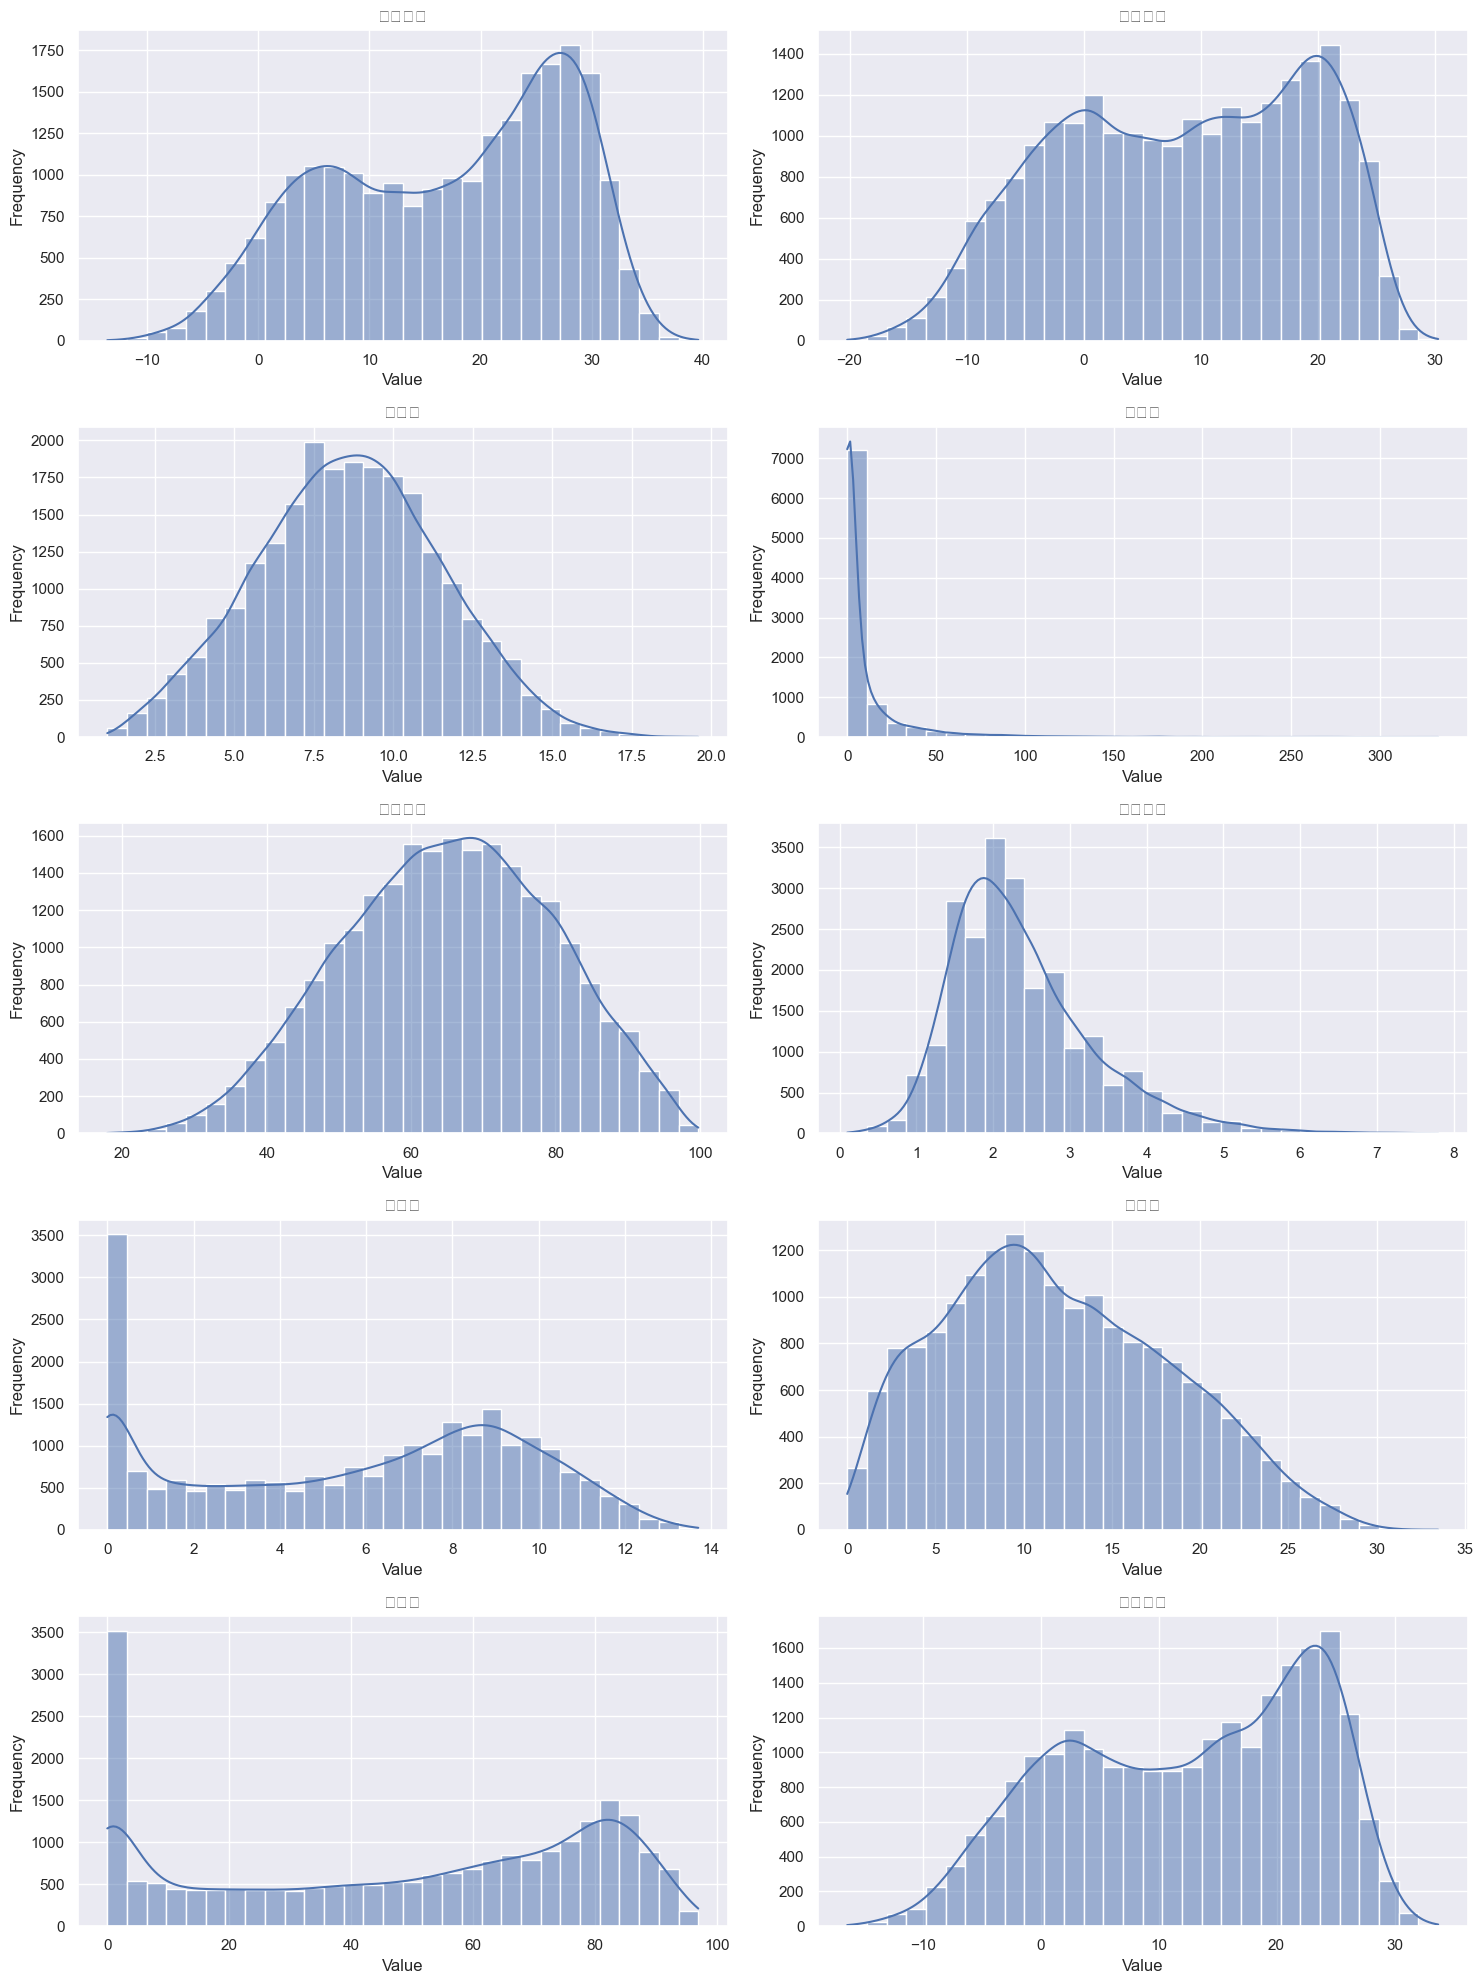

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns 세팅
sns.set()

# 서브플롯 생성
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# 컬럼
columns = ['최고기온', '최저기온', '일교차', '강수량', '평균습도', '평균풍속', '일조합', '일사합', '일조율', '평균기온']

# 컬럼 별로 시각화
for i, col in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.histplot(df[col], bins=30, kde=True, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Value')

# 레이아웃
plt.tight_layout()

plt.show()


In [79]:
df['일시'] = pd.to_datetime(df['일시'])

In [80]:
df['Month'] = df['일시'].dt.month
df['Year'] = df['일시'].dt.year
df['Month'], df['Year']

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 23006    12
 23007    12
 23008    12
 23009    12
 23010    12
 Name: Month, Length: 23011, dtype: int32,
 0        1960
 1        1960
 2        1960
 3        1960
 4        1960
          ... 
 23006    2022
 23007    2022
 23008    2022
 23009    2022
 23010    2022
 Name: Year, Length: 23011, dtype: int32)

In [81]:
# Function to map month to season
def map_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'aut'
    else:  # 12, 1, 2
        return 'win'

# Apply the function to create a new '계절' column
df['계절'] = df['Month'].apply(map_season)

# Show the first few rows to verify the new column
df[['일시', 'Month', '계절']].head()


,일시,Month,계절
0,1960-01-01,1,win
1,1960-01-02,1,win
2,1960-01-03,1,win
3,1960-01-04,1,win
4,1960-01-05,1,win


C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE

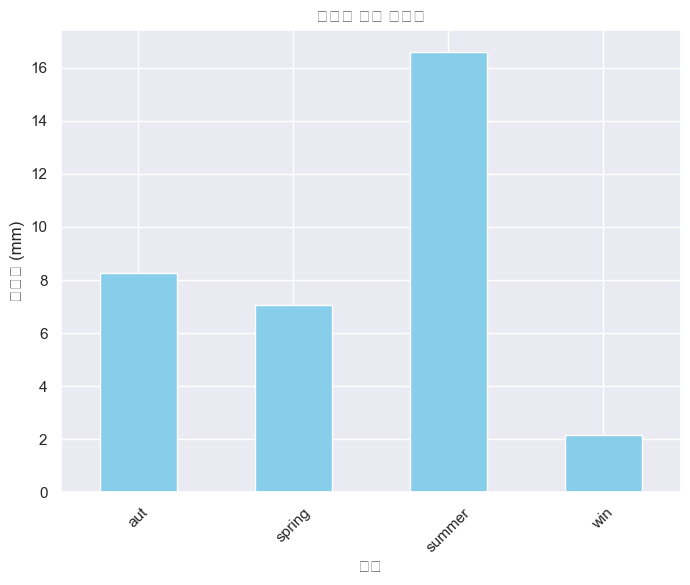

In [82]:
# Grouping the data by season and calculating the mean precipitation
seasonal_precipitation = df.groupby('계절')['강수량'].mean()

# Plotting the mean precipitation for each season
plt.figure(figsize=(8, 6))
seasonal_precipitation.plot(kind='bar', color='skyblue')
plt.title('계절별 평균 강수량')
plt.xlabel('계절')
plt.ylabel('강수량 (mm)')
plt.xticks(rotation=45)
plt.show()

In [83]:
# df['강수량'].fillna(method='bfill',inplace=True)
df['강수량'].bfill(inplace=True)


6) 평균풍속 4 : 전날과 비슷할 가능성이 높음, 평균값 대체 가능성

7) 일조합 118

8) 일사합 4862

9) 일조율 366

일조합 (Total Sunshine Duration): 일정 기간 동안 태양이 구름이나 다른 대기 현상에 가려지지 않고 지표에 직접 도달하는 총 시간을 나타냅니다. 이는 태양 광선이 얼마나 오랜 시간 동안 지표에 도달했는지를 보여주는 지표로, 농업, 태양 에너지 발전 등 다양한 분야에서 중요한 정보로 활용됩니다.

일사합 (Total Solar Radiation): 일정 기간 동안 지표에 도달한 태양 복사 에너지의 총량을 나타냅니다. 일사량은 일반적으로 메가줄(MJ) 단위로 측정되며, 태양 에너지의 강도와 지속 시간을 반영합니다. 이는 기후 연구, 태양 에너지 시스템 설계, 농업 기후 모델링 등에서 중요한 변수로 사용됩니다.

일조율 (Sunshine Percentage or Sunshine Duration Percentage): 가능한 최대 일조 시간 대비 실제 일조 시간의 비율을 나타냅니다. 예를 들어, 하루 중 태양이 빛날 수 있는 최대 시간이 10시간이고, 실제 일조 시간이 5시간이라면 일조율은 50%가 됩니다. 이 지표는 기후 패턴, 관광 계획, 농작물 성장 조건 등의 분석에 유용합니다.

일조율과 일사율은

In [84]:
df['평균풍속'].bfill(inplace=True)

In [85]:
column_names = {
    '일시': 'Date',
    '최고기온': 'Max Temp',
    '최저기온': 'Min Temp',
    '일교차': 'Temperature Range',
    '강수량': 'Precipitation',
    '평균습도': 'Average Humidity',
    '평균풍속': 'Average Wind Speed',
    '일조합': 'Total Sunshine Duration',
    '일사합': 'Total Solar Radiation',
    '일조율': 'Sunshine Percentage',
    '평균기온': 'Average Temperature',
    'Year': 'Year',
    'Month': 'Month',
    'Day': 'Day',
    '계절': 'Season'
}

df.rename(columns=column_names, inplace=True)

df.head()


,Date,Max Temp,Min Temp,Temperature Range,Precipitation,Average Humidity,Average Wind Speed,Total Sunshine Duration,Total Solar Radiation,Sunshine Percentage,Average Temperature,Month,Year,Season
0,1960-01-01,2.2,-5.2,7.4,0.4,68.3,1.7,6.7,NaN,NaN,-1.6,1,1960,win
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9,1,1960,win
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0,1,1960,win
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5,1,1960,win
4,1960-01-05,1.3,-8.2,9.5,0.0,44.0,5.1,8.2,NaN,NaN,-4.6,1,1960,win


C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hangil\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABL

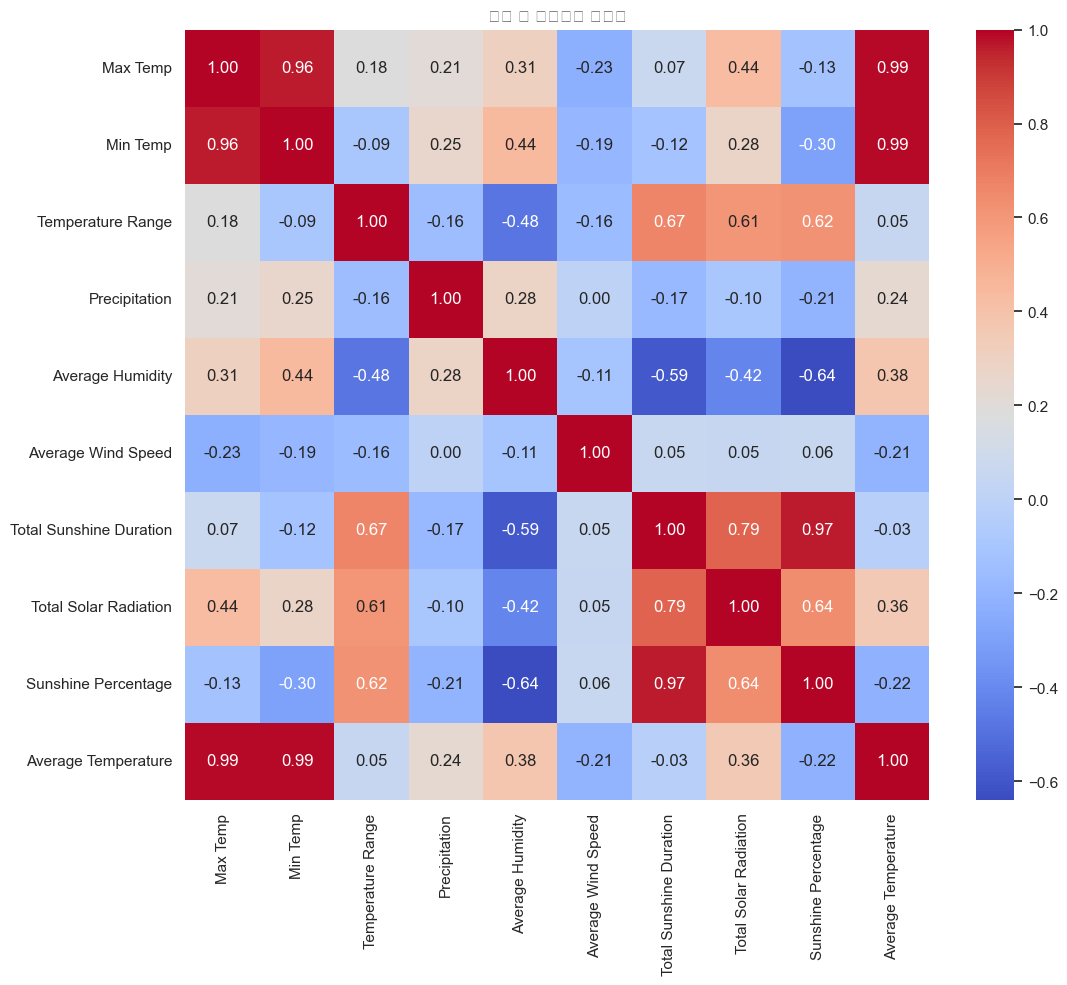

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = ['Max Temp',
        'Min Temp',
        'Temperature Range',
        'Precipitation',
        'Average Humidity',
        'Average Wind Speed',
        'Total Sunshine Duration',
        'Total Solar Radiation',
        'Sunshine Percentage',
        'Average Temperature']
correlation_matrix = df[cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('변수 간 상관관계 시각화')
plt.show()

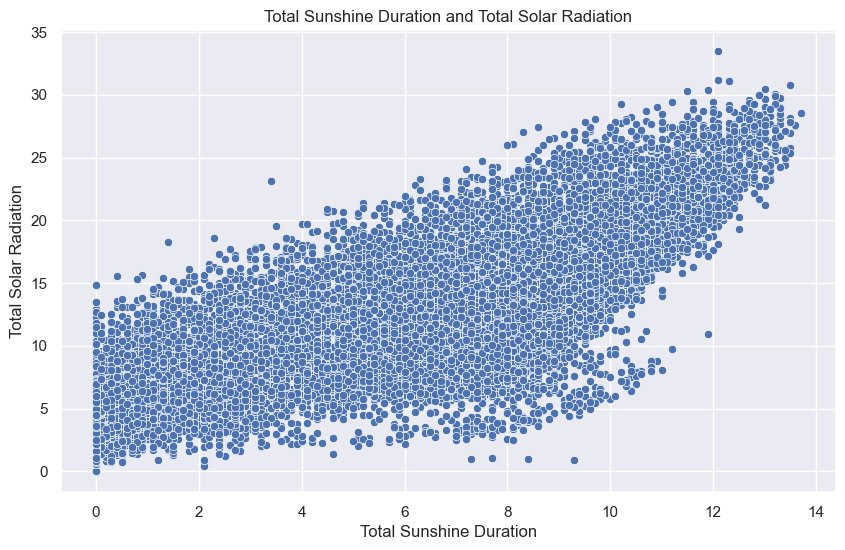

In [87]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Sunshine Duration', y='Total Solar Radiation')
plt.title('Total Sunshine Duration and Total Solar Radiation')
plt.xlabel('Total Sunshine Duration')
plt.ylabel('Total Solar Radiation')
plt.show()

In [88]:
korean_column_names = {v: k for k, v in column_names.items()}
df.rename(columns=korean_column_names, inplace=True)

In [89]:
monthly_mean_solar_radiation = df.groupby('Month')['일조합'].transform('mean')

df.loc[df['일조합'].isnull(), '일조합'] = monthly_mean_solar_radiation[df['일조합'].isnull()]

solar_missing = df['일조합'].isnull().sum()
solar_missing

0

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data_lr = df.dropna(subset=['일조합', '일사합'])


X = data_lr[['일조합']]
y = data_lr['일사합'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

4.004405547342899

In [91]:

missing_solar_radiation = df['일사합'].isnull() & df['일조합'].notnull()
df.loc[missing_solar_radiation, '일사합'] = model.predict(df.loc[missing_solar_radiation, ['일조합']])


missing_values = df['일사합'].isnull().sum()
missing_values

0

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data_lr = df.dropna(subset=['일조합', '일조율'])


X = data_lr[['일조합']]
y = data_lr['일조율'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

rmse

8.808261503251043

In [93]:

missing_solar_radiation = df['일조율'].isnull() & df['일조합'].notnull()
df.loc[missing_solar_radiation, '일조율'] = model.predict(df.loc[missing_solar_radiation, ['일조합']])


missing_values = df['일조율'].isnull().sum()
missing_values

0

In [94]:
df.isnull().sum()

일시       0
최고기온     0
최저기온     0
일교차      0
강수량      0
평균습도     0
평균풍속     0
일조합      0
일사합      0
일조율      0
평균기온     0
Month    0
Year     0
계절       0
dtype: int64